In [1]:
import os
import numpy as np
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [18]:
#Setup Database
load_dotenv()
uri = os.environ['DB_URI']
client = MongoClient(uri)
db = client["rosen"]
collection = db["big_data_2"]

In [32]:
# for no only use region "Europe"
# TODO use other regions
documents = collection.find({"configuration": "Europe"}, {"_id": 1, "instrument": 1, "configuration": 1, "wall_thickness": 1, "magnetization": 1})
files = pd.DataFrame(list(documents))

In [33]:
dfs = {}

# filter only by instrument, configuration currently not distinguished
for name in files["instrument"].unique():
    temp_df = files[files["instrument"] == name]
    array_wall_thickness = np.concatenate(temp_df["wall_thickness"].values)
    array_magnetization = np.concatenate(temp_df["magnetization"].values)
    new_df = pd.DataFrame({"wall_thickness": array_wall_thickness, "magnetization": array_magnetization})
    dfs[name] = new_df


'Unicorn'

,wall_thickness,magnetization
0,23.992223,0.276038
1,24.104632,97.860675
2,22.732213,2.207298
3,23.796405,1.651769
4,23.795261,0.715412


<Axes: xlabel='wall_thickness', ylabel='magnetization'>

'Pufferfish'

,wall_thickness,magnetization
0,21.653860,9.436640
1,21.272048,7.864456
2,26.140578,11.091493
3,21.162160,9.552124
4,21.983308,10.119990


<Axes: xlabel='wall_thickness', ylabel='magnetization'>

'Dolphin'

,wall_thickness,magnetization
0,6.990124,-17.551402
1,6.609507,-16.797828
2,7.072319,-17.353123
3,7.268865,-18.038673
4,7.153712,-16.489285


<Axes: xlabel='wall_thickness', ylabel='magnetization'>

'Dog'

,wall_thickness,magnetization
0,25.553738,-5.753318
1,13.500313,-4.892939
2,18.974413,-6.448737
3,12.835640,-6.613867
4,15.996035,-6.932696


<Axes: xlabel='wall_thickness', ylabel='magnetization'>

'Elephant'

,wall_thickness,magnetization
0,29.271226,32.537529
1,28.438077,32.235699
2,28.616417,32.167957
3,28.029229,32.206760
4,29.405027,30.962859


<Axes: xlabel='wall_thickness', ylabel='magnetization'>

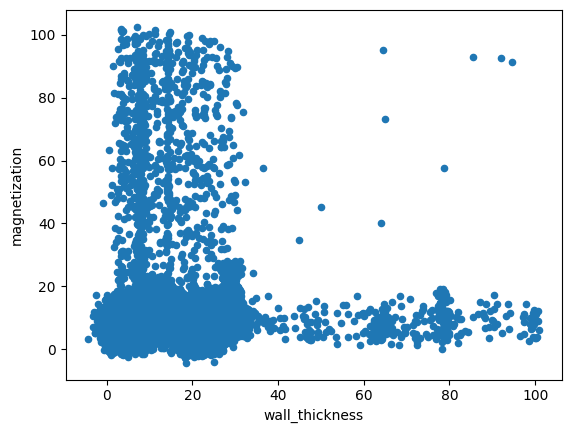

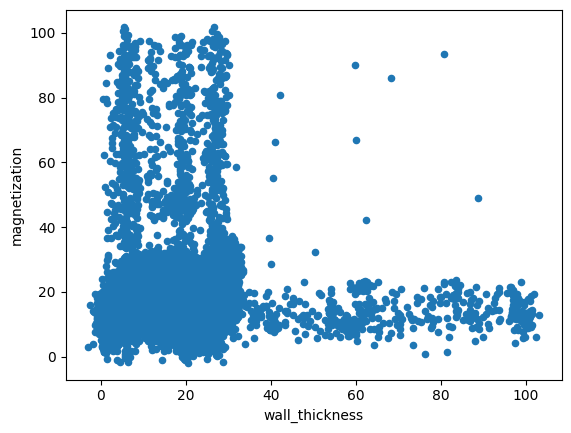

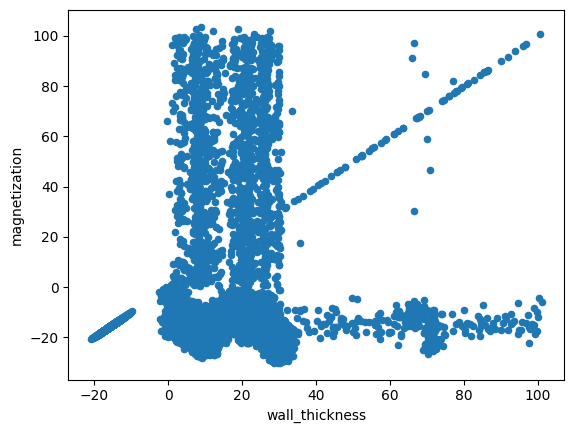

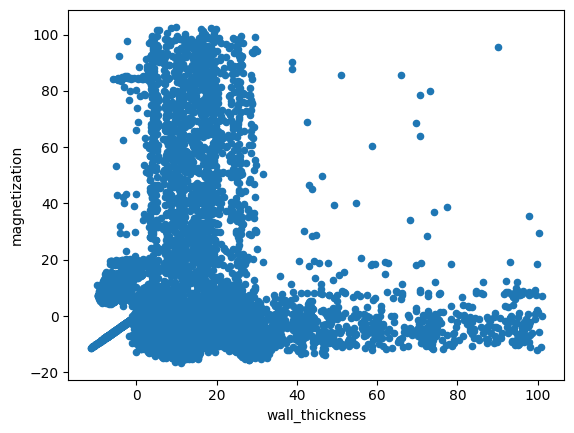

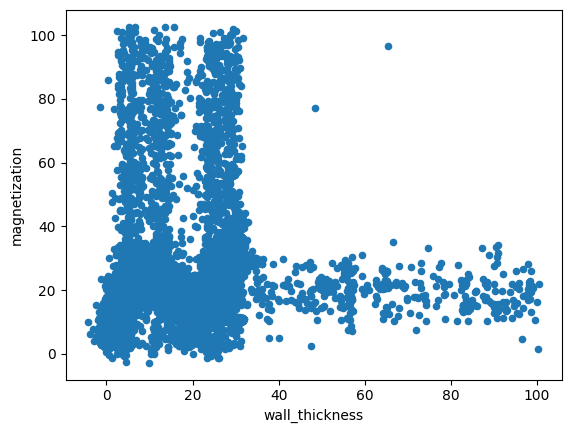

In [34]:
for instrument, df in dfs.items():
    display(instrument)
    display(df.head())
    display(df.plot(kind="scatter", x="wall_thickness", y="magnetization"))
    
    

hier ist wahrscheinlich irgendwo der effekt mit den "langgezogenen punktwolken" aufgrund der abnutzung der kontakte drin